In [332]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


## Complete Data Analysis on Covid-19 India

In [ ]:
#### Importing Libraries

#### Importing Libraries

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df=pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


### Information about data

In [263]:
df.shape

(9291, 9)

In [264]:
df.dtypes


Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [265]:
df.size

83619

#### Dropping some columns

In [266]:
df.drop(["Sno","Time"],axis=1,inplace=True)
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3


In [267]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3


##### Data cleaning 

In [268]:
df.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [269]:


df_nan=df[df.isna().any(axis=1)]
display(df_nan)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [270]:
x=df.groupby("State/UnionTerritory")
x.get_group("Manipur")

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
327,24/03/20,Manipur,1,0,0,0,1
351,25/03/20,Manipur,1,0,0,0,1
381,26/03/20,Manipur,1,0,0,0,1
408,27/03/20,Manipur,1,0,0,0,1
435,28/03/20,Manipur,1,0,0,0,1
...,...,...,...,...,...,...,...
9136,05/12/20,Manipur,-,-,22445,295,25691
9171,06/12/20,Manipur,-,-,22655,299,25857
9206,07/12/20,Manipur,-,-,22848,306,26073
9241,08/12/20,Manipur,-,-,22997,309,26225


In [271]:
df.fillna(0)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
9286,09/12/20,Telengana,-,-,266120,1480,275261
9287,09/12/20,Tripura,-,-,32169,373,32945
9288,09/12/20,Uttarakhand,-,-,72435,1307,79141
9289,09/12/20,Uttar Pradesh,-,-,528832,7967,558173


In [272]:
df=df[df["ConfirmedForeignNational"]!='-']

In [273]:
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].str.replace('\xa0', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [274]:
df["ConfirmedForeignNational"].unique()

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6'],
      dtype=object)

In [275]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [276]:
#df.fillna('0',inplace=True)

df.fillna('29',inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [277]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [278]:
df["ConfirmedForeignNational"]=df["ConfirmedForeignNational"].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [279]:
df["ConfirmedForeignNational"].dtypes

dtype('int64')

In [280]:
df["ConfirmedForeignNational"].describe()

count    446.000000
mean       1.495516
std        3.576292
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: ConfirmedForeignNational, dtype: float64

#### We filled mean value 29 in place of NaN value which was previously filled as 0

In [281]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      446 non-null    object
 1   State/UnionTerritory      446 non-null    object
 2   ConfirmedIndianNational   446 non-null    object
 3   ConfirmedForeignNational  446 non-null    int64 
 4   Cured                     446 non-null    int64 
 5   Deaths                    446 non-null    int64 
 6   Confirmed                 446 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.9+ KB


### We still see Deaths column's datatype is Object , Change that to int for calculation

In [283]:
df["Deaths"].unique()

array([0, 1, 2, 3, 4, 5])

In [284]:
#df["Deaths"]=df["Deaths"].str.replace("\xa0","")

In [285]:
df["Deaths"].unique()

array([0, 1, 2, 3, 4, 5])

In [286]:
df["Deaths"]=df["Deaths"].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [287]:
df["Deaths"].unique()

array([0, 1, 2, 3, 4, 5])

In [288]:
df["Deaths"].dtypes

dtype('int64')

In [289]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      446 non-null    object
 1   State/UnionTerritory      446 non-null    object
 2   ConfirmedIndianNational   446 non-null    object
 3   ConfirmedForeignNational  446 non-null    int64 
 4   Cured                     446 non-null    int64 
 5   Deaths                    446 non-null    int64 
 6   Confirmed                 446 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.9+ KB


In [291]:
df["ConfirmedIndianNational"].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54'], dtype=object)

In [292]:
df["ConfirmedIndianNational"]=df["ConfirmedIndianNational"].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      446 non-null    object
 1   State/UnionTerritory      446 non-null    object
 2   ConfirmedIndianNational   446 non-null    int64 
 3   ConfirmedForeignNational  446 non-null    int64 
 4   Cured                     446 non-null    int64 
 5   Deaths                    446 non-null    int64 
 6   Confirmed                 446 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.9+ KB


In [294]:
df["Date"].describe()

count          446
unique          59
top       26/03/20
freq            27
Name: Date, dtype: object

In [295]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3


### Work only with month for easy
##### Remove year and dates

### Make new Column Month

In [296]:
df["Month"]=df["Date"].str[4:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [297]:
df.drop("Date",axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [298]:
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
0,Kerala,1,0,0,0,1,1
1,Kerala,1,0,0,0,1,1
2,Kerala,2,0,0,0,2,2
3,Kerala,3,0,0,0,3,2
4,Kerala,3,0,0,0,3,2


In [299]:
df["Month"]=df["Month"].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [300]:
df["Month"].dtypes

dtype('int64')

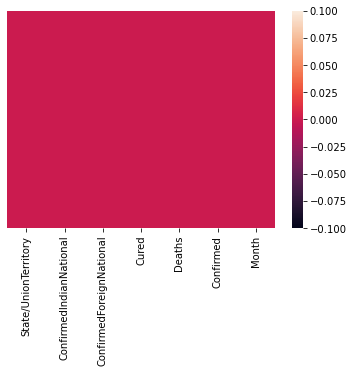

In [301]:
sns.heatmap(df.isnull(),yticklabels=False)

### Finally Data is Well Cleaned

### Arithmetic Information about data

In [302]:
df.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,12.188341,1.495516,1.089686,0.244395,13.683857,2.926009
std,21.582253,3.576292,2.642952,0.596546,22.550937,0.278674
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,3.000000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,13.000000,1.000000,1.000000,0.000000,15.000000,3.000000
max,177.000000,14.000000,25.000000,5.000000,180.000000,3.000000


### Confirmed Cases of State/Union Territory

In [303]:
plt.figure(figsize=(15,4))
Confirmed_state=df["Confirmed"].groupby(df["State/UnionTerritory"]).sum().sort_values()
Confirmed_state

State/UnionTerritory
Mizoram                           4
Manipur                           5
Andaman and Nicobar Islands       8
Goa                               9
Puducherry                       11
Himachal Pradesh                 21
Odisha                           23
Chhattisgarh                     25
Bihar                            32
Uttarakhand                      40
Chandigarh                       50
West Bengal                      71
Andhra Pradesh                   81
Jammu and Kashmir                95
Madhya Pradesh                  105
Ladakh                          162
Tamil Nadu                      164
Punjab                          231
Gujarat                         261
Telengana                       343
Delhi                           363
Haryana                         377
Karnataka                       405
Rajasthan                       431
Uttar Pradesh                   479
Maharashtra                    1147
Kerala                         1160
Name: C

<Figure size 1080x288 with 0 Axes>

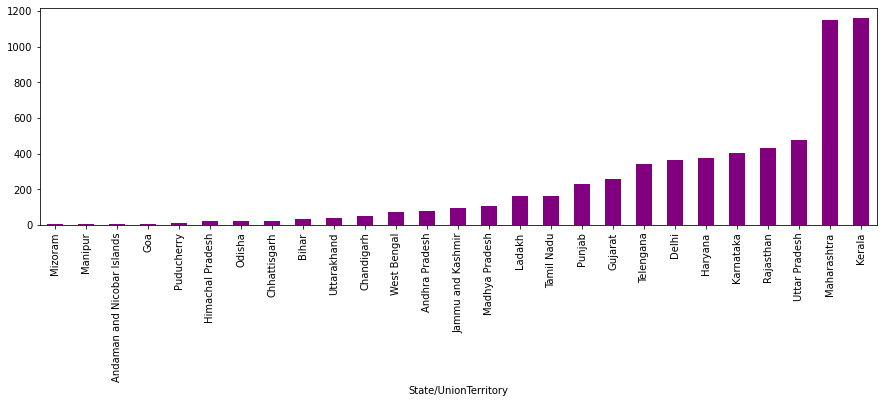

In [304]:
plt.figure(figsize=(15,4))
Confirmed_state.plot(kind='bar',color='purple')

#### Death of State/Union Territory

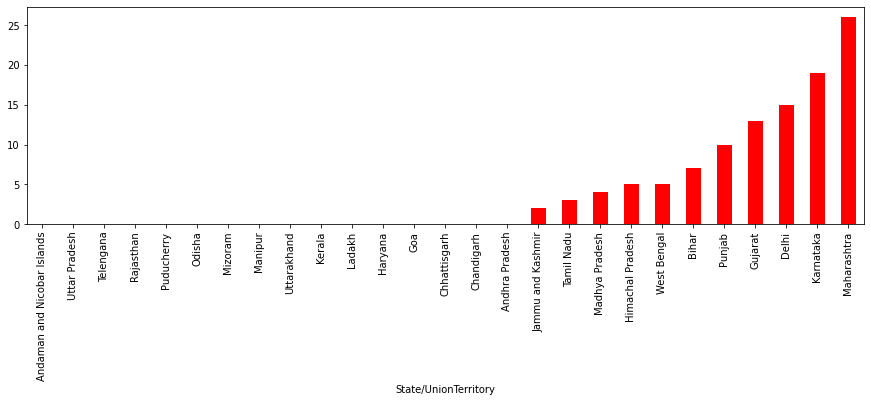

In [305]:
plt.figure(figsize=(15,4))
death_state=df["Deaths"].groupby(df["State/UnionTerritory"]).sum().sort_values()
death_state.plot(kind='bar',color='red')

#### Dadra and Nagar Haveli and Daman and Diu has lowest deaths 2
#### Maharashtra has highest death counts to 7371

In [306]:
plt.figure(figsize=(15,4))
cured_state=df["Cured"].groupby(df["State/UnionTerritory"]).sum().sort_values(False)
cured_state

State/UnionTerritory
Andaman and Nicobar Islands      0
Puducherry                       0
Odisha                           0
Mizoram                          0
Manipur                          0
Madhya Pradesh                   0
Uttarakhand                      0
Himachal Pradesh                 0
West Bengal                      0
Gujarat                          0
Bihar                            0
Chhattisgarh                     0
Goa                              0
Chandigarh                       0
Punjab                           1
Jammu and Kashmir                4
Andhra Pradesh                   4
Ladakh                           6
Tamil Nadu                      11
Telengana                       14
Karnataka                       21
Maharashtra                     42
Rajasthan                       43
Haryana                         56
Delhi                           62
Kerala                          99
Uttar Pradesh                  123
Name: Cured, dtype: int64

<Figure size 1080x288 with 0 Axes>

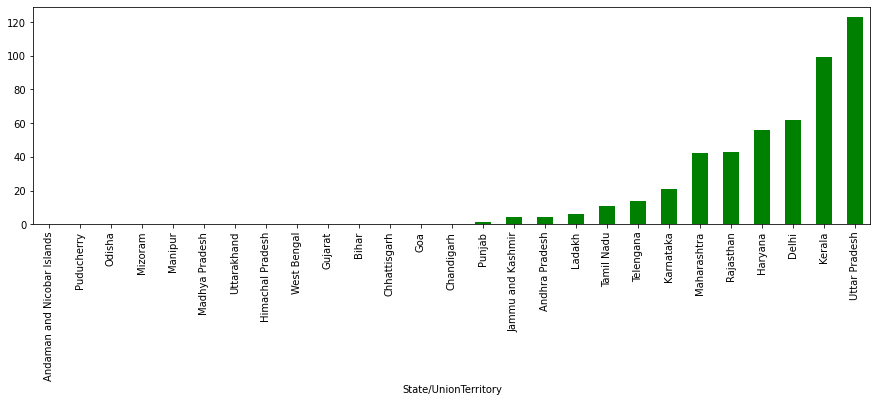

In [307]:
plt.figure(figsize=(15,4))
cured_state.plot(kind='bar',color='green')

### From graph we see, Maharastra's citizen have cured most as there cases are also maximum 
##### Followed by Karnataka and Andra Pradesh

### See in which Month, Deaths,Confirmed,and Cured is more and less

In [308]:
Death_month=df["Deaths"].groupby(df["Month"]).sum()
Death_month

Month
1      0
2      0
3    109
Name: Deaths, dtype: int64

### Mosts of the deaths are in Month 2

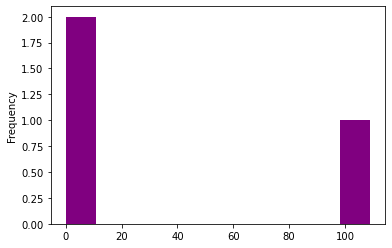

In [309]:
Death_month.plot(kind='hist',color='purple')

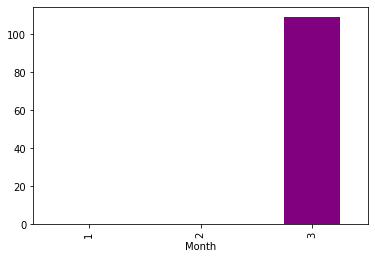

In [310]:
Death_month.plot(kind='bar',color='Purple')

##### plot confirmed cases between National and Internation with respect to month
##### Indian cases is extremely increasing

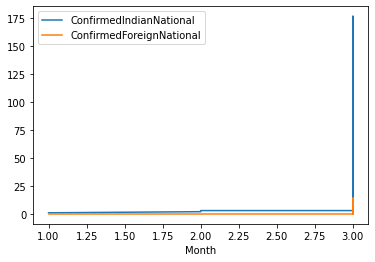

In [311]:

df.plot(x='Month', y=["ConfirmedIndianNational", "ConfirmedForeignNational"])

In [312]:
df_cpy=df.copy()

df_cpy.drop("State/UnionTerritory",axis=1,inplace=True)



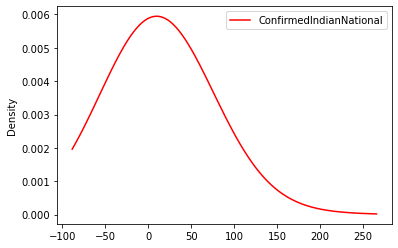

In [313]:

s = pd.DataFrame(
    df["ConfirmedIndianNational"])

ax = s.plot.kde(bw_method=3,color='r')


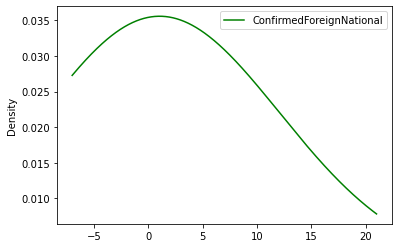

In [314]:

s = pd.DataFrame(
    df["ConfirmedForeignNational"])

ax = s.plot.kde(bw_method=3,color='g')


### Compare between Indian and Foreign cases

In [315]:
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
0,Kerala,1,0,0,0,1,1
1,Kerala,1,0,0,0,1,1
2,Kerala,2,0,0,0,2,2
3,Kerala,3,0,0,0,3,2
4,Kerala,3,0,0,0,3,2


In [316]:
df["ConfirmedIndianNational"].describe()


count    446.000000
mean      12.188341
std       21.582253
min        0.000000
25%        1.000000
50%        3.000000
75%       13.000000
max      177.000000
Name: ConfirmedIndianNational, dtype: float64

In [317]:
print("Total Confirmed National Case: ",df["ConfirmedIndianNational"].sum())


Total Confirmed National Case:  5436


In [318]:
df["ConfirmedForeignNational"].describe()


count    446.000000
mean       1.495516
std        3.576292
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: ConfirmedForeignNational, dtype: float64

In [319]:
print("Total Confirmed Foreign National Case: ",df["ConfirmedForeignNational"].sum())


Total Confirmed Foreign National Case:  667


### National Case are Greater than that of International case

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10d72c0d50>,
      dtype=object)

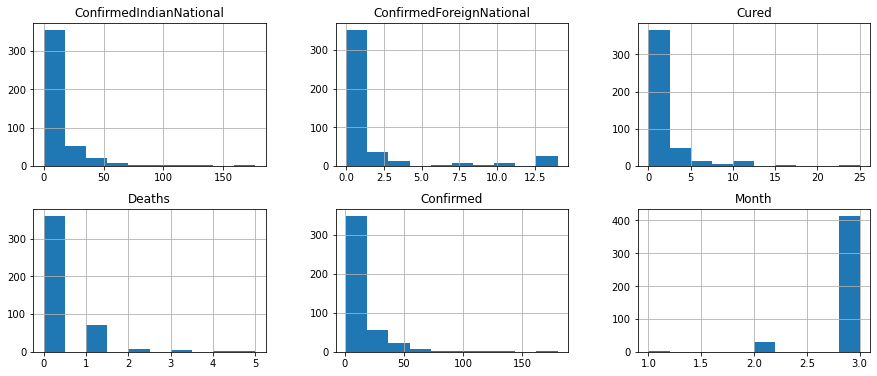

In [320]:
df.hist(figsize=(15,30),layout=(9,3))

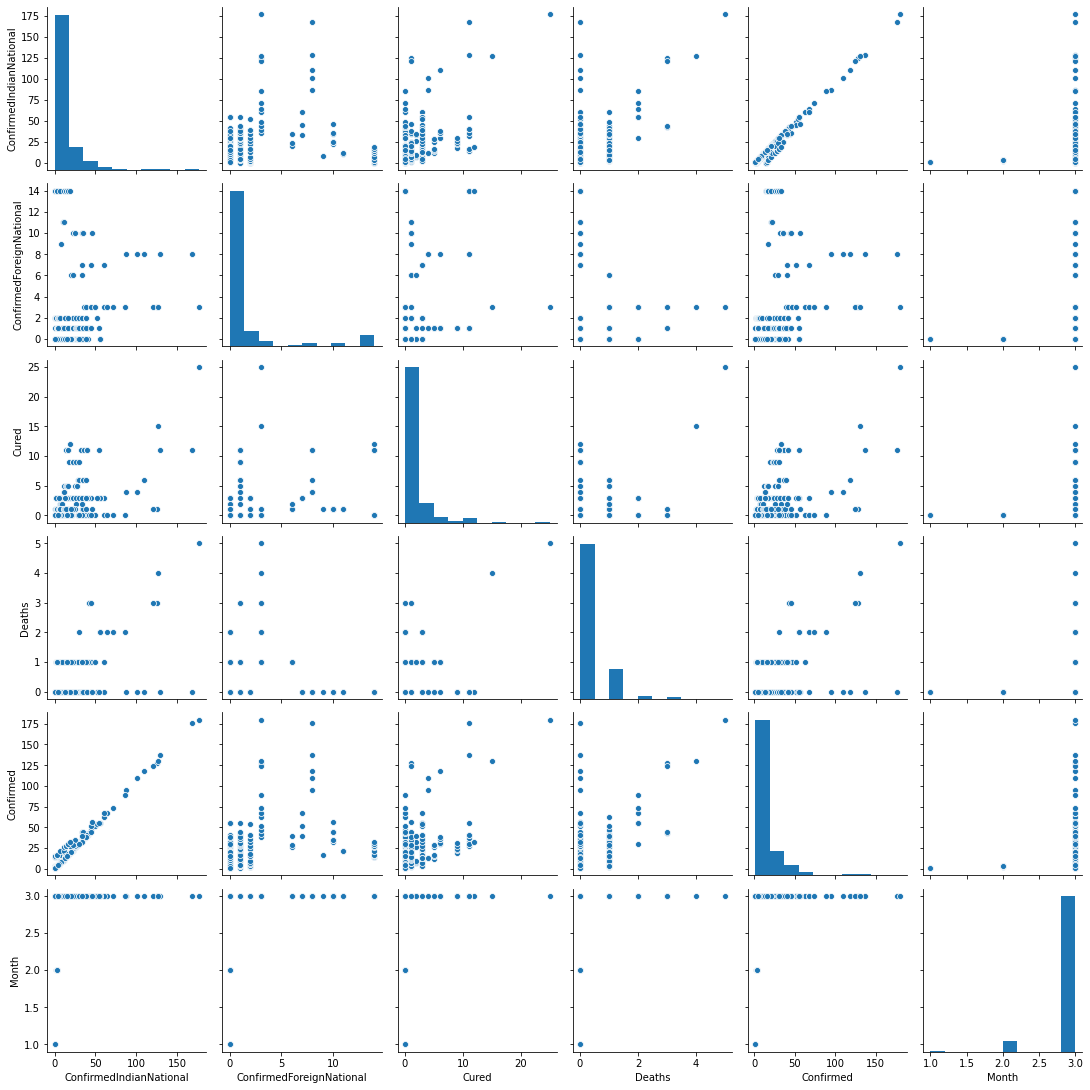

In [321]:
sns.pairplot(df)

In [322]:
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
0,Kerala,1,0,0,0,1,1
1,Kerala,1,0,0,0,1,1
2,Kerala,2,0,0,0,2,2
3,Kerala,3,0,0,0,3,2
4,Kerala,3,0,0,0,3,2


### Let's Explore Karnataka

In [323]:
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
0,Kerala,1,0,0,0,1,1
1,Kerala,1,0,0,0,1,1
2,Kerala,2,0,0,0,2,2
3,Kerala,3,0,0,0,3,2
4,Kerala,3,0,0,0,3,2


In [324]:
gr=df.groupby("State/UnionTerritory")
karnataka=gr.get_group("Karnataka")
karnataka

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month
74,Karnataka,1,0,0,0,1,3
89,Karnataka,4,0,0,0,4,3
108,Karnataka,4,0,0,0,4,3
119,Karnataka,4,0,0,0,4,3
132,Karnataka,6,0,0,1,6,3
145,Karnataka,6,0,0,1,6,3
151,Karnataka,6,0,0,1,6,3
165,Karnataka,6,0,0,1,6,3
180,Karnataka,11,0,0,1,11,3
195,Karnataka,11,0,0,1,11,3


In [325]:
karnataka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 74 to 430
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UnionTerritory      20 non-null     object
 1   ConfirmedIndianNational   20 non-null     int64 
 2   ConfirmedForeignNational  20 non-null     int64 
 3   Cured                     20 non-null     int64 
 4   Deaths                    20 non-null     int64 
 5   Confirmed                 20 non-null     int64 
 6   Month                     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


### Information About Karnataka

In [326]:
print("Karnataka")

deaths=karnataka["Deaths"].sum()
confirmed=karnataka["Confirmed"].sum()
cured=karnataka["Cured"].sum()
print("Cured:" ,cured)
print("Confirmed: ",confirmed)
print("Deaths :",deaths)

Karnataka
Cured: 21
Confirmed:  405
Deaths : 19


In [327]:

gr=df.groupby("State/UnionTerritory").sum()
for i in range(len(gr)):
    print(gr.iloc[i])
    print()

ConfirmedIndianNational     8
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   8
Month                       9
Name: Andaman and Nicobar Islands, dtype: int64

ConfirmedIndianNational     81
ConfirmedForeignNational     0
Cured                        4
Deaths                       0
Confirmed                   81
Month                       51
Name: Andhra Pradesh, dtype: int64

ConfirmedIndianNational     32
ConfirmedForeignNational     0
Cured                        0
Deaths                       7
Confirmed                   32
Month                       21
Name: Bihar, dtype: int64

ConfirmedIndianNational     50
ConfirmedForeignNational     0
Cured                        0
Deaths                       0
Confirmed                   50
Month                       30
Name: Chandigarh, dtype: int64

ConfirmedIndianNational     25
ConfirmedForeignNational     0
Cured                        0
Deaths                   

### Confirmed cases in India for the national and international citizen

##### National Cases

In [328]:
national=df["ConfirmedIndianNational"].groupby(df["State/UnionTerritory"]).sum().sort_values()
print(national)


State/UnionTerritory
Mizoram                           4
Manipur                           5
Andaman and Nicobar Islands       8
Goa                               9
Puducherry                       11
Himachal Pradesh                 21
Odisha                           23
Chhattisgarh                     25
Bihar                            32
Uttarakhand                      35
Chandigarh                       50
West Bengal                      71
Andhra Pradesh                   81
Jammu and Kashmir                95
Madhya Pradesh                  105
Haryana                         111
Tamil Nadu                      138
Ladakh                          162
Punjab                          231
Telengana                       246
Gujarat                         256
Rajasthan                       296
Delhi                           352
Karnataka                       405
Uttar Pradesh                   462
Kerala                         1091
Maharashtra                    1111
Name: C

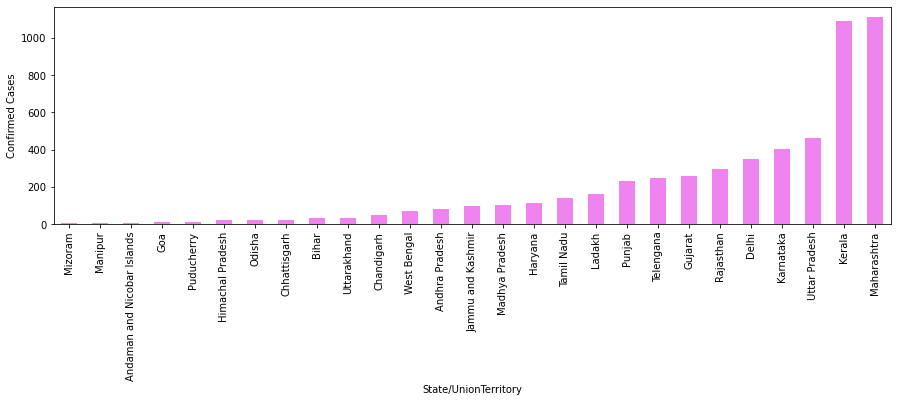

In [329]:
plt.figure(figsize=(15,4))
plt.ylabel("Confirmed Cases")
national.plot(kind='bar',color='violet')

#### Maharastra has more confirmed cases with the count of 1111
#### Mizoram has less confirmed cases with the count of 4

##### International Citizen's Confirmed Cases

In [330]:
international=df["ConfirmedForeignNational"].groupby(df["State/UnionTerritory"]).sum().sort_values()
print(international)

State/UnionTerritory
Andaman and Nicobar Islands      0
Punjab                           0
Puducherry                       0
Odisha                           0
Mizoram                          0
Manipur                          0
Madhya Pradesh                   0
Karnataka                        0
Jammu and Kashmir                0
Ladakh                           0
Chandigarh                       0
Andhra Pradesh                   0
Bihar                            0
Himachal Pradesh                 0
Chhattisgarh                     0
West Bengal                      0
Goa                              0
Uttarakhand                      5
Gujarat                          5
Delhi                           11
Uttar Pradesh                   17
Tamil Nadu                      26
Maharashtra                     36
Kerala                          69
Telengana                       97
Rajasthan                      135
Haryana                        266
Name: ConfirmedForeignNational, dt

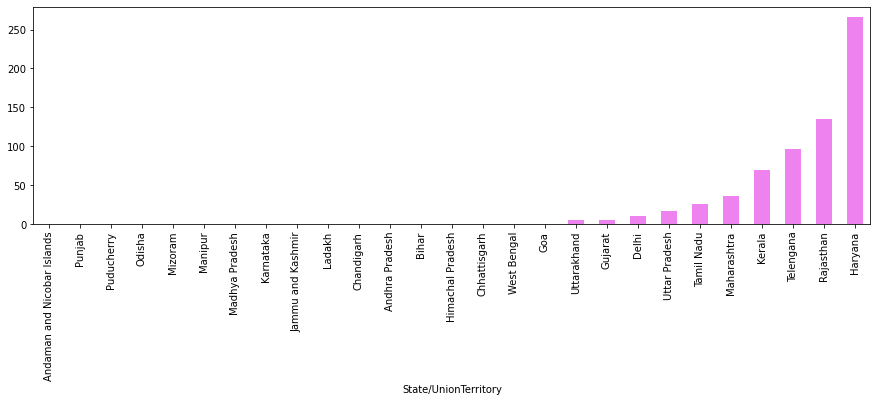

In [331]:
plt.figure(figsize=(15,4))
international.plot(kind='bar',color='violet')

##### Many states has zero cases
##### Maximum Confirmed case is in Hariyana with count of 266 

##### Tourists better stay away from Hariyana :P